#### 딥러닝으로 성능 개선

In [9]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np

# TF-IDF 데이터베이스 읽어 들이기
data = pickle.load(open("dataset/genre.pickle", "rb"))
y = data[0] # 레이블
x = data[1] # TF-IDF

print(len(x))
print(len(y))
# 학습 전용과 테스트 전용으로 구분하기 
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)

# 나이브 베이즈로 학습하기 
model = GaussianNB()
model.fit(x_train, y_train)

# 평가하고 결과 출력하기 
y_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
rep = metrics.classification_report(y_test, y_pred)

print("정답률=", acc)
print(rep)


3197
3197
정답률= 0.8328125
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       156
           1       0.83      0.76      0.79       156
           2       0.75      0.91      0.82       159
           3       0.86      0.77      0.81       169

    accuracy                           0.83       640
   macro avg       0.84      0.83      0.83       640
weighted avg       0.84      0.83      0.83       640



In [ ]:
import pickle
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
warnings.filterwarnings('ignore')

# 분류할 레이블 수 
nb_classes = 4

# 데이터베이스 읽어 들이기 
data = pickle.load(open("./dataset/genre.pickle", "rb"))
y = data[0] # 레이블
x = data[1] # TF-IDF

Train on 2557 samples, validate on 640 samples
Epoch 1/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.8351 - accuracy: 0.7474 - val_loss: 0.4058 - val_accuracy: 0.8703
Epoch 2/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.2319 - accuracy: 0.9292 - val_loss: 0.3166 - val_accuracy: 0.8844
Epoch 3/10
2557/2557 [==============================] - 5s 2ms/step - loss: 0.0993 - accuracy: 0.9738 - val_loss: 0.3086 - val_accuracy: 0.8969
Epoch 4/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9890 - val_loss: 0.3147 - val_accuracy: 0.8984
Epoch 5/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.3517 - val_accuracy: 0.8906
Epoch 6/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.3969 - val_accuracy: 0.8891
Epoch 7/10
2557/2557 [==============================] - 5s 2ms/step - loss: 0.0068 - accu

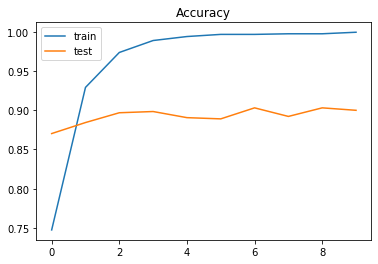

In [16]:
import pickle
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
warnings.filterwarnings('ignore')

# 분류할 레이블 수 
nb_classes = 4

# 데이터베이스 읽어 들이기 
data = pickle.load(open("./dataset/genre.pickle", "rb"))
y = data[0] # 레이블
x = data[1] # TF-IDF
# 레이블 데이터를 One-hot 형식으로 변환하기
y = keras.utils.np_utils.to_categorical(y, nb_classes)
in_size = x[0].shape[0]

# 학습 전용과 테스트 전용으로 구분하기 
x_train, x_test, y_train, y_test = train_test_split(
        np.array(x), np.array(y), test_size=0.2)

# MLP모델의 구조 정의하기
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

# 모델 컴파일하기 
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 학습 실행하기 
hist = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# 평가하기 
score = model.evaluate(x_test, y_test, verbose=1)
print("정답률=", score[1], 'loss=', score[0])

# 가중치데이터 저장하기 
model.save_weights('./dataset/genre-model.hdf5')

# 학습 상태를 그래프로 그리기
# 모델 학습을 위해 fit() 함수를 사용하며 리턴값으로 학습 이력(History) 정보를 리턴
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도
# plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Train on 2557 samples, validate on 640 samples
Epoch 1/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.8471 - accuracy: 0.7286 - val_loss: 0.4126 - val_accuracy: 0.8766
Epoch 2/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.2432 - accuracy: 0.9249 - val_loss: 0.3320 - val_accuracy: 0.8781
Epoch 3/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9707 - val_loss: 0.3106 - val_accuracy: 0.8781
Epoch 4/10
2557/2557 [==============================] - 4s 2ms/step - loss: 0.0475 - accuracy: 0.9871 - val_loss: 0.3264 - val_accuracy: 0.8859
Epoch 5/10
2557/2557 [==============================] - 5s 2ms/step - loss: 0.0210 - accuracy: 0.9953 - val_loss: 0.3622 - val_accuracy: 0.8859
Epoch 6/10
2557/2557 [==============================] - 7s 3ms/step - loss: 0.0094 - accuracy: 0.9980 - val_loss: 0.3840 - val_accuracy: 0.8891
Epoch 7/10
2557/2557 [==============================] - 6s 3ms/step - loss: 0.0051 - accu

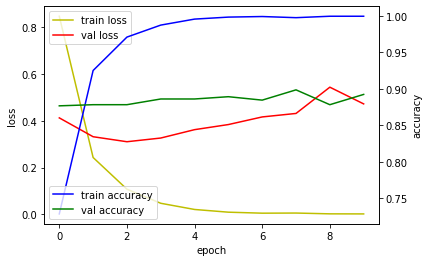

In [17]:
import pickle
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
warnings.filterwarnings('ignore')

# 분류할 레이블 수 
nb_classes = 4

# 데이터베이스 읽어 들이기 
data = pickle.load(open("./dataset/genre.pickle", "rb"))
y = data[0] # 레이블
x = data[1] # TF-IDF
# 레이블 데이터를 One-hot 형식으로 변환하기
y = keras.utils.np_utils.to_categorical(y, nb_classes)
in_size = x[0].shape[0]

# 학습 전용과 테스트 전용으로 구분하기 
x_train, x_test, y_train, y_test = train_test_split(
        np.array(x), np.array(y), test_size=0.2)

# MLP모델의 구조 정의하기
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

# 모델 컴파일하기 
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 학습 실행하기 
hist = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# 평가하기 
score = model.evaluate(x_test, y_test, verbose=1)
print("정답률=", score[1], 'loss=', score[0])

# 가중치데이터 저장하기 
model.save_weights('./dataset/genre-model.hdf5')

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [18]:
import pickle, tfidf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json
import warnings
warnings.filterwarnings('ignore')

# 텍스트 준비하기 --- ( ※ 1)
text1 = """
대통령이 북한과 관련된 이야기로 한미 정상회담을 준비하고 있습니다.
"""
text2 = """
iPhone과 iPad를 모두 가지고 다니므로 USB를 2개 연결할 수 있는 휴대용 배터리를 선호합니다.
"""
text3 = """
이번 주에는 미세먼지가 많을 것으로 예상되므로 노약자는 외출을 자제하는 것이 좋습니다.
"""

# TF-IDF 사전 읽어 들이기 --- (*2)
tfidf.load_dic("./dataset/genre-tdidf.dic")

# Keras 모델 정의하고 가중치 데이터 읽어 들이기 --- (*3)
nb_classes = 4
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(36120,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
model.load_weights('./dataset/genre-model.hdf5')

# 텍스트 지정해서 판별하기 --- (*4)
def check_genre(text):
    # 레이블 정의하기
    LABELS = ["정치", "경제", "생활 ", "IT/과학"]
    # TF-IDF 벡터로 변환하기 -- (*5)
    data = tfidf.calc_text(text)
    # MLP로 예측하기 --- (*6)
    pre = model.predict(np.array([data]))[0]
    n = pre.argmax()
    print(LABELS[n], "(", pre[n], ")")
    return LABELS[n], float(pre[n]), int(n) 

if __name__ == '__main__':
    check_genre(text1)
    check_genre(text2)
    check_genre(text3)

정치 ( 1.0 )
IT/과학 ( 0.7510082 )
생활  ( 0.99982774 )
